# Task 4: Demonstrating Quantum Advantage

In [110]:
"""
This task is intentionally open-ended, so no boilerplate code is provided.

You may use this notebook to develop your solution, or create a separate file if you prefer.
We recommend starting by copying over your previous implementations of the QRNG, TRNG, and PRNG.
Then, explore ways to modularize and combine these components to design a use case that
demonstrates the unique advantages of quantum randomness.

Your write-up can be included directly in this notebook or submitted separately.
You're welcome to prepare it as a Google Doc or LaTeX document and upload a PDF to the GitHub repository—
just be sure to clearly indicate where it can be found if it's not included here.
"""

"\nThis task is intentionally open-ended, so no boilerplate code is provided.\n\nYou may use this notebook to develop your solution, or create a separate file if you prefer.\nWe recommend starting by copying over your previous implementations of the QRNG, TRNG, and PRNG.\nThen, explore ways to modularize and combine these components to design a use case that\ndemonstrates the unique advantages of quantum randomness.\n\nYour write-up can be included directly in this notebook or submitted separately.\nYou're welcome to prepare it as a Google Doc or LaTeX document and upload a PDF to the GitHub repository—\njust be sure to clearly indicate where it can be found if it's not included here.\n"

In [6]:
%pip install requests
%pip install numpy
%pip install matplotlib
%pip install pyaudio
%pip install psutil
%pip install pandas
%pip install seaborn
%pip install scipy
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      /private/var/folders/f5/299vphyd6fz0xl9_z3gz0w7h0000gn/T/pip-build-env-ijyj_d9k/overlay/lib/python3.12/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI

In [7]:
# Package Imports - feel free to add what you think might be useful! 
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from scipy.stats import kstest, laplace
from ucimlrepo import fetch_ucirepo
import hashlib
import struct
import psutil
import platform
import math
import pandas as pd
import seaborn as sns

In [12]:
def get_qrng_floats(n, min_val=0.0, max_val=1.0):
    url = "https://qrng.idqloud.com/api/1.0/double"
    headers = {"X-API-KEY": "aTo4BKRvnc49uRWDk034zaua87vGRXKk9TMLdfkI"}
    max_chunk = 16
    results = []
    
    # Split requests into chunks
    for _ in range(n // max_chunk):
        response = requests.get(
            url,
            headers=headers,
            params={
                "min": str(min_val),
                "max": str(max_val),
                "quantity": str(max_chunk)
            }
        )
        response.raise_for_status()
        results.extend(response.json()['data'])
    
    # Handle remaining numbers
    remaining = n % max_chunk
    if remaining > 0:
        response = requests.get(
            url,
            headers=headers,
            params={
                "min": str(min_val),
                "max": str(max_val),
                "quantity": str(remaining)
            }
        )
        response.raise_for_status()
        results.extend(response.json()['data'])
    
    return np.array(results, dtype=np.float64)

In [13]:
def get_laplace_transform(P, epsilon):
    # P is the scaled random numbers from get_qrng_floats()
    # Epsilon is the threshold for privacy (smaller epsilon = more privacy = less utility)
    b = 1 / epsilon
    laplace = []
    for p in P:
        if p == 0:
            laplace.append(float('-inf'))
        elif p < 0.5:
            laplace.append(b * math.log(2 * p))
        else:
            laplace.append(-b * math.log(2 * (1 - p)))
    return laplace

In [264]:
random_numbers = get_qrng_floats(1000)
print(random_numbers)


[0.83763215 0.2937956  0.22012753 0.9332684  0.00897872 0.07112862
 0.8295853  0.54103383 0.88463324 0.69911225 0.64881203 0.39553948
 0.29665297 0.63320326 0.71482699 0.94554531 0.37096889 0.70147751
 0.57876394 0.96911754 0.08528157 0.10374896 0.27859588 0.37925607
 0.61942595 0.03679957 0.61933733 0.89936209 0.39093241 0.57590286
 0.80840261 0.57264798 0.87966869 0.68340171 0.40031526 0.25494037
 0.62327959 0.97550158 0.43791985 0.34024469 0.02176703 0.92472741
 0.37117923 0.62397085 0.12525354 0.09482572 0.92644839 0.21384436
 0.35108383 0.352826   0.98313881 0.64178926 0.08360059 0.76802209
 0.07899645 0.13072227 0.87735083 0.08575862 0.95581522 0.58064259
 0.46433831 0.54245181 0.82345941 0.94442759 0.85141222 0.84131418
 0.99002835 0.94016849 0.04188024 0.70464378 0.28799649 0.89167332
 0.81217069 0.81867588 0.5907417  0.22174997 0.67934637 0.78432434
 0.20706701 0.44566463 0.75438343 0.48513135 0.95297824 0.95145661
 0.46998741 0.7546445  0.24223667 0.80654825 0.05023618 0.6301

In [268]:
epsilon = 0.25
laplace_transform = get_laplace_transform(random_numbers, epsilon)

In [117]:
size = 20

changes = -np.random.poisson(2, size)
positive = 324 + np.maximum.reduce([changes, np.random.normal(0, 4, size).astype(int)]).cumsum()
total = 100000 + changes.cumsum()

In [ ]:
# random_numPy_array = np.array(random_numbers)
# file_path = 'random_numbers.csv'
# np.savetxt(file_path, random_numPy_array, delimiter=',', fmt='%f')
# print(f"Array data saved to '{file_path}")

Array data saved to 'random_numbers.csv


In [270]:
statistic, p_value = kstest(laplace_transform, 'laplace', args=(0, (1 / epsilon)))
print(f"KS statistic = {statistic:.4f}, p-value = {p_value:.4f}")

KS statistic = 0.0332, p-value = 0.2147


(10000,)


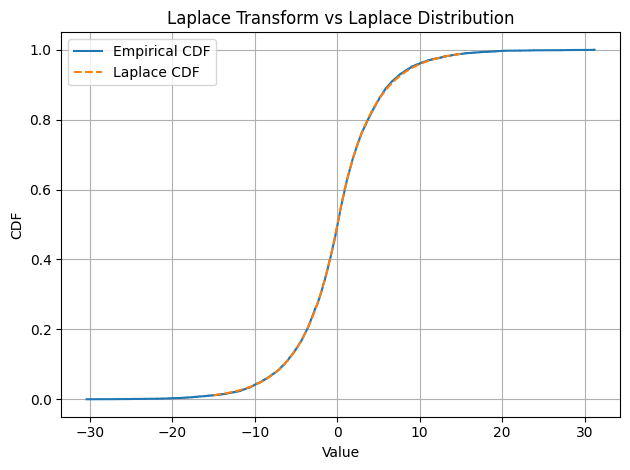

In [214]:
laplace_df = pd.DataFrame(laplace_transform)
plot_cdf_vs_laplace(laplace_df[0], "Laplace Transform vs Laplace Distribution")

In [8]:
columns = [
    'age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode',
    'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_status',
    'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin',
    'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat',
    'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status',
    'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat',
    'detailed_household_summary_in_household', 'instance_weight', 'migration_code_change_in_msa',
    'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18',
    'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self',
    'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin',
    'veterans_benefits', 'weeks_worked_in_year', 'year', 'income'
]
# fetch dataset
census_income_kdd = fetch_ucirepo(id=117)

In [10]:
df_features = census_income_kdd.data.features 
df_targets = census_income_kdd.data.targets 

# include everything BUT income
df_features.columns = columns[:-1]
# include ONLY income
df_targets.columns = [columns[-1]]

df = pd.concat([df_features, df_targets], axis=1)

display(df)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0,94,-50000
2,18,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,0,95,-50000
3,9,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000
4,10,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0,95,-50000
199519,65,Self-employed-incorporated,37,2,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0,94,-50000
199520,47,Not in universe,0,0,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,0,95,-50000
199521,16,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0,95,-50000


In [17]:
# Example: searching dataset by father's country of birth
counts = df['country_of_birth_father'].value_counts()
print("True counts per father's country of birth:")
display(counts)

True counts per father's country of birth:


country_of_birth_father
United-States                   160479
Mexico                            9781
Puerto-Rico                       2473
Italy                             1844
Canada                            1451
Germany                           1382
Philippines                       1231
Poland                            1110
Cuba                              1108
El-Salvador                       1108
Dominican-Republic                1103
England                            903
China                              760
Columbia                           612
South Korea                        609
Ireland                            599
India                              581
Vietnam                            473
Japan                              469
Jamaica                            453
Guatemala                          444
Ecuador                            375
Peru                               355
Haiti                              353
Portugal                           342
N

In [159]:
n = len(counts)
random_numbers = get_qrng_floats(n)
epsilon = 0.25
laplace_noise = get_laplace_transform(random_numbers, epsilon)
privatized_counts = [max(0, count + noise) for count, noise in zip(counts.values, laplace_noise)]

In [144]:
df_plot = pd.DataFrame({
    'Category': counts.index,
    'True Count': counts.values,
    # 'Privatized Count': privatized_counts
    'Privatized Count': [int(x) for x in privatized_counts]
})

print(df_plot)

                      Category  True Count  Privatized Count
0                United-States       43832             43834
1                       Mexico         951               951
2                  Philippines         295               294
3                      Germany         206               201
4                  Puerto-Rico         184               183
5                       Canada         182               174
6                  El-Salvador         155               152
7                        India         151               141
8                         Cuba         138               139
9                      England         127               133
10                       China         122               121
11                       South         115               111
12                     Jamaica         106               105
13                       Italy         105               105
14          Dominican-Republic         103               106
15                      

True Counts Mean: 4604.857142857143
Privatized Counts Mean: 4602.952380952381
(42,)


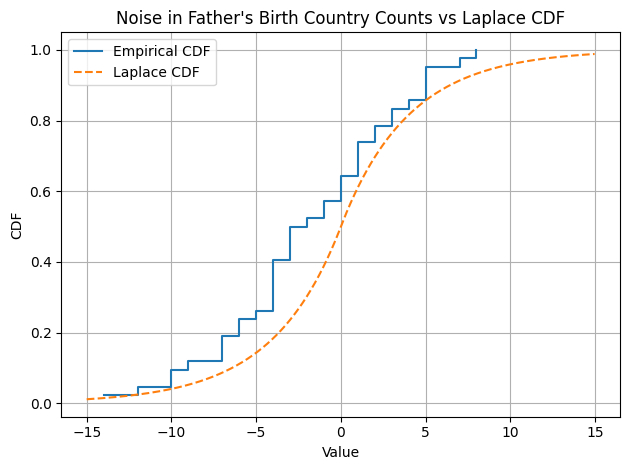

In [243]:
privatized_counts_series = pd.Series([int(x) for x in privatized_counts], index=counts.index)

print("True Counts Mean:", counts.mean())
print("Privatized Counts Mean:", privatized_counts_series.mean())


# Compute differences between privatized and true counts
differences = privatized_counts_series - counts

# Plot CDF of differences to verify noise distribution
plot_cdf_vs_laplace(differences, "Noise in Father's Birth Country Counts vs Laplace CDF")

In [146]:
differences = privatized_counts_series - counts
statistic, p_value = kstest(differences, 'laplace', args=(0, 4))
print(f"KS statistic = {statistic:.4f}, p-value = {p_value:.4f}")

KS statistic = 0.2561, p-value = 0.0074


In [158]:
# Calculate IQR for the 'Positive' column
q1 = df_plot['True Count'].quantile(0.25)
q3 = df_plot['True Count'].quantile(0.75)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows with outliers in the 'Positive' column
filtered_df_plot = df_plot[(df_plot['True Count'] >= lower_bound) & (df_plot['True Count'] <= upper_bound)]

# Recalculate correlation after removing outliers
df_corr = np.corrcoef(filtered_df_plot['True Count'], filtered_df_plot['Privatized Count'])[0, 1]

print(f"Correlation between True and Privatized Counts (after removing outliers): {df_corr:.4f}")


Correlation between True and Privatized Counts (after removing outliers): 0.9949


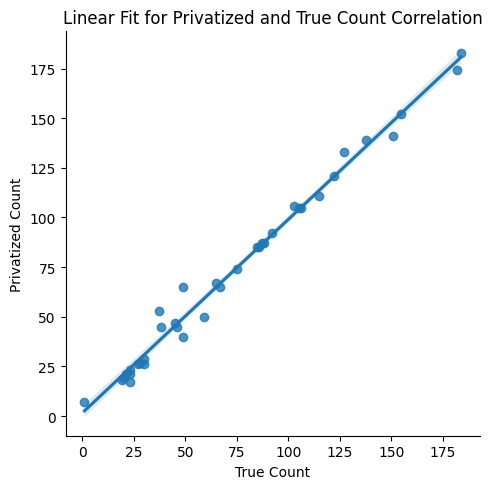

In [161]:
sns.lmplot(x='True Count', y='Privatized Count', data=pd.DataFrame({
    'True Count': filtered_df_plot['True Count'][1:],
    'Privatized Count': filtered_df_plot['Privatized Count'][1:]
}))
plt.title('Linear Fit for Privatized and True Count Correlation')
plt.tight_layout()
plt.show()

In [2]:
# Put in a data column that you would like to apply differential privacy to
# Put in the epsilon value for the epsilon-differential privacy
# Put in whether or not the data should be truncated to an int automatically
def add_noise(data, epsilon, cast_to_int=False):
    data_instances = len(data)
    quantum_random_numbers = get_qrng_floats(data_instances)
    noise = get_laplace_transform(quantum_random_numbers, epsilon)
    try:
        if cast_to_int:
            data_dp = data + np.array(noise).astype(int)
        else:
            data_dp = data + np.array(noise)
    except:
        print("Please input a 1 dimensional array for differential privatization")
        return
    return data_dp

In [19]:
display(add_noise(counts, 0.25, True))

country_of_birth_father
United-States                   160482
Mexico                            9786
Puerto-Rico                       2474
Italy                             1840
Canada                            1451
Germany                           1397
Philippines                       1243
Poland                            1111
Cuba                              1114
El-Salvador                       1115
Dominican-Republic                1092
England                            901
China                              760
Columbia                           612
South Korea                        614
Ireland                            599
India                              584
Vietnam                            474
Japan                              469
Jamaica                            452
Guatemala                          442
Ecuador                            372
Peru                               357
Haiti                              352
Portugal                           346
N

In [ ]:
class JitterRNG:
    def __init__(self, pool_size=256):
        self.entropy_pool = deque(maxlen=pool_size)
        self.pool_size = pool_size
        self.last_time = None
    
    def _collect_timing_jitter(self, iterations=1000):
        """Collect entropy from timing variations between CPU operations"""
        jitter_data = []
        
        self.last_time = time.perf_counter_ns()
        
        for _ in range(iterations):
            """ 
            We need to introduce variability somehow. 
            In the following space, do some arbitrary computation to introduce variability.
            We're not going to judge this part. Just make it reasonable so your notebook
            doesn't take forever to run.
            """
            sum(range(100)) # Quick

            current_time = time.perf_counter_ns()
            
            time_diff = current_time - self.last_time
            # hint: the JitterRNG class has a last_time attribute, 
            # and you just computed the current time.
            
            # Extract the least significant bits of the time difference
            # This is where the true randomness comes from
            lsb = time_diff & 0xFF
            # hint: bitwise ops 
            jitter_data.append(lsb)

            self.last_time = current_time

        return jitter_data
    
    def fill_entropy_pool(self):
        """Fill the entropy pool with timing jitter data"""
        # Collect enough jitter samples to fill the pool
        jitter_data = self._collect_timing_jitter(self.pool_size)
        
        # Add to the entropy pool
        for value in jitter_data:
            self.entropy_pool.append(value)
        
        return jitter_data
    
    def get_random_bytes(self, num_bytes=32):
        """Generate random bytes using the entropy pool"""
        # Make sure we have enough entropy
        if len(self.entropy_pool) < self.pool_size:
            self.fill_entropy_pool()
        
        # Mix the entropy pool using SHA-256
        pool_bytes = bytes(self.entropy_pool)
        mixed_entropy = hashlib.sha256(pool_bytes).digest()
        
        # Create an output buffer
        result = bytearray()
        
        # Generate requested number of bytes
        while len(result) < num_bytes:
            # Add more entropy to the pool
            self.fill_entropy_pool()
            
            # Mix new entropy with previous hash
            pool_bytes = bytes(self.entropy_pool)
            h = hashlib.sha256()
            h.update(mixed_entropy)
            h.update(pool_bytes)
            mixed_entropy = h.digest()
            
            # Add to result
            result.extend(mixed_entropy)
        
        # Return only the requested number of bytes
        return bytes(result[:num_bytes])
    
    def get_random_int(self, min_val=0, max_val=100):
        """Generate a random integer between min_val and max_val (inclusive)"""
        # Calculate how many bytes we need
        range_size = max_val - min_val + 1
        if range_size <= 0:
            raise ValueError("Invalid range")
        
        # Calculate how many bits we need
        bits_needed = range_size.bit_length()
        bytes_needed = (bits_needed + 7) // 8
        
        # Get random bytes
        random_bytes = self.get_random_bytes(bytes_needed)
        
        # Convert bytes to integer
        value = int.from_bytes(random_bytes, byteorder='big')
        
        # Map to our range
        return min_val + (value % range_size)
    
    def analyze_randomness(self, sample_size=1000):
        """Analyze the randomness of the generator"""
        # Generate samples
        samples = []
        for _ in range(sample_size):
            samples.append(self.get_random_int(0, 255))
        
        # Create plots
        plt.figure(figsize=(12, 10))
        
        # Plot 1: Distribution histogram
        plt.subplot(2, 2, 1)
        plt.hist(samples, bins=32, color='blue', alpha=0.7)
        plt.title('Distribution of Random Values')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        
        # Plot 2: Sequential values
        plt.subplot(2, 2, 2)
        plt.plot(samples[:100], '.-', alpha=0.7)
        plt.title('First 100 Generated Values')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        
        # Plot 3: Scatter plot of consecutive values
        plt.subplot(2, 2, 3)
        plt.scatter(samples[:-1], samples[1:], alpha=0.5, s=5)
        plt.title('Scatter Plot of Consecutive Values')
        plt.xlabel('Value n')
        plt.ylabel('Value n+1')
        
        # Plot 4: Autocorrelation
        plt.subplot(2, 2, 4)
        autocorr = np.correlate(samples, samples, mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr = autocorr / autocorr[0]
        plt.plot(autocorr[:50])
        plt.title('Autocorrelation')
        plt.xlabel('Lag')
        plt.ylabel('Correlation')
        
        plt.tight_layout()
        plt.show()
        
        return samples

In [255]:
# Example usage
jitter_rng = JitterRNG()
random_data = np.array([jitter_rng.get_random_int(0, 2**64) for i in range(10000)]) / (2**64 + 1)
print(random_data)
#print(f"First 10 random numbers: {random_data[:10]}")
TRNG_laplace = get_laplace_transform(random_data, epsilon)

[0.4098603220441851 0.886244173389173 0.16223774071838293 ...
 0.30129467827199174 0.9640411735322398 0.5188090547270442]


(10000,)


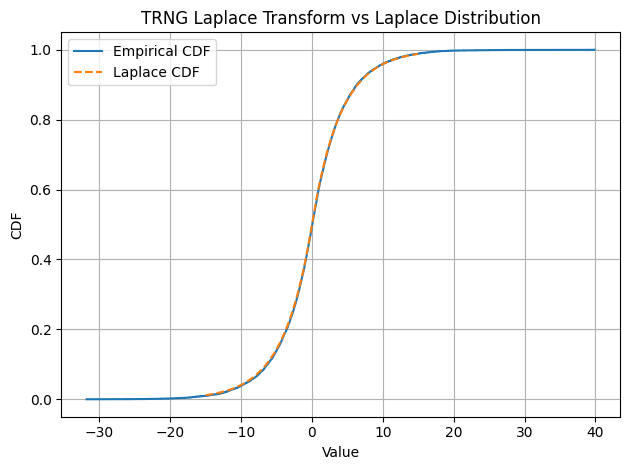

In [257]:
TRNG_df = pd.DataFrame(TRNG_laplace)
plot_cdf_vs_laplace(TRNG_df[0], "TRNG Laplace Transform vs Laplace Distribution")

In [259]:
statistic, p_value = kstest(TRNG_laplace, 'laplace', args=(0, (1 / epsilon)))
print(f"KS statistic = {statistic:.4f}, p-value = {p_value:.4f}")

KS statistic = 0.0092, p-value = 0.3644


(500,)


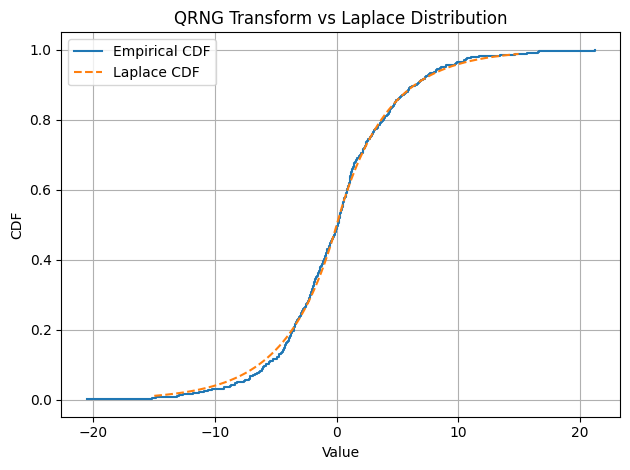

In [319]:
laplace_df = pd.DataFrame(laplace_transform)
plot_cdf_vs_laplace(laplace_df[0], "QRNG Transform vs Laplace Distribution")

In [307]:
import os

p_array = []
statistic_array = []
epsilon = 0.25

checkpoint_dir = os.path.join("checkpoints", "QRNG")
os.makedirs(checkpoint_dir, exist_ok=True)

for i in range(201, 500):
    random_numbers = get_qrng_floats(500)
    laplace_transform = get_laplace_transform(random_numbers, epsilon)
    statistic, p_value = kstest(laplace_transform, 'laplace', args=(0, (1 / epsilon)))
    p_array.append(p_value)
    statistic_array.append(statistic)
    if (i % 25 == 0 and i > 0):
        # Save checkpoints in checkpoints\QRNG
        p_path = os.path.join(checkpoint_dir, f"p_array_checkpoint_{i}.csv")
        s_path = os.path.join(checkpoint_dir, f"statistic_array_checkpoint_{i}.csv")
        pd.DataFrame(p_array).to_csv(p_path, index=False, header=False)
        pd.DataFrame(statistic_array).to_csv(s_path, index=False, header=False)

# Save final arrays
pd.DataFrame(p_array).to_csv(os.path.join(checkpoint_dir, "p_array.csv"), index=False, header=False)
pd.DataFrame(statistic_array).to_csv(os.path.join(checkpoint_dir, "statistic_array.csv"), index=False, header=False)

KeyboardInterrupt: 

(500,)


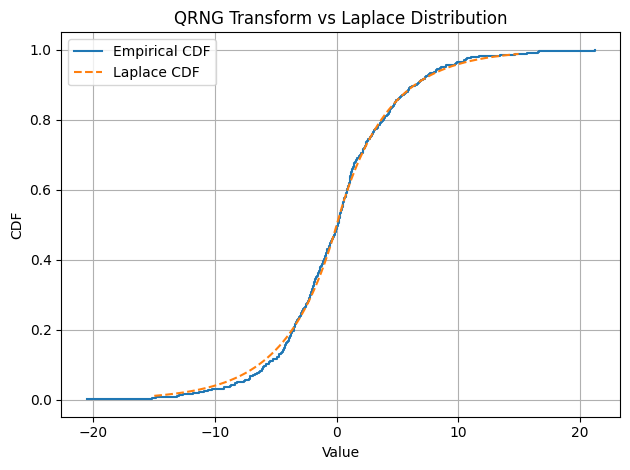

In [333]:
laplace_df = pd.DataFrame(laplace_transform)
plot_cdf_vs_laplace(laplace_df[0], "QRNG Transform vs Laplace Distribution")

In [280]:
import pandas as pd

# QRNG statistics
qrng_stats = pd.read_csv("Checkpoints/QRNG/statistic_array.csv", header=None)
qrng_mean = qrng_stats.mean().iloc[0]
qrng_std = qrng_stats.std().iloc[0]
print(f"QRNG statistic_array.csv: mean = {qrng_mean:.6f}, std = {qrng_std:.6f}")

# TRNG statistics
trng_stats = pd.read_csv("Checkpoints/TRNG/statistic_array.csv", header=None)
trng_mean = trng_stats.mean().iloc[0]
trng_std = trng_stats.std().iloc[0]
print(f"TRNG statistic_array.csv: mean = {trng_mean:.6f}, std = {trng_std:.6f}")

QRNG statistic_array.csv: mean = 0.038649, std = 0.011399
TRNG statistic_array.csv: mean = 0.037837, std = 0.011283


In [330]:
import os

TRNG_p = []
TRNG_statistic = []
epsilon = 0.25
TRNG_checkpoint_dir = os.path.join("checkpoints", "TRNG")
for i in range(500):
    TRNG_rng = JitterRNG()
    random_data = np.array([TRNG_rng.get_random_int(0, 2**64) for i in range(500)]) / (2**64 + 1)
    TRNG_laplace = get_laplace_transform(random_data, epsilon)
    TRNG_df = pd.DataFrame(TRNG_laplace)
    statistic, p_value = kstest(TRNG_laplace, 'laplace', args=(0, (1 / epsilon)))
    TRNG_statistic.append(statistic)
    TRNG_p.append(p_value)
    if (i % 25 == 0 and i > 0):
       # Save checkpoints in checkpoints\QRNG
       p_path = os.path.join(TRNG_checkpoint_dir, f"p_array_checkpoint_{i}.csv")
       s_path = os.path.join(TRNG_checkpoint_dir, f"statistic_array_checkpoint_{i}.csv")
       pd.DataFrame(TRNG_p).to_csv(p_path, index=False, header=False)
       pd.DataFrame(TRNG_statistic).to_csv(s_path, index=False, header=False)

# Save final arrays
pd.DataFrame(TRNG_p).to_csv(os.path.join(TRNG_checkpoint_dir, "p_array.csv"), index=False, header=False)
pd.DataFrame(TRNG_statistic).to_csv(os.path.join(TRNG_checkpoint_dir, "statistic_array.csv"), index=False, header=False)


In [331]:
import pandas as pd
from scipy.stats import ttest_ind

# Load data
qrng_stats = pd.read_csv("Checkpoints/QRNG/statistic_array.csv", header=None)[0]
trng_stats = pd.read_csv("Checkpoints/TRNG/statistic_array.csv", header=None)[0]

# Calculate means and stds (already done above, but shown for clarity)
qrng_mean = qrng_stats.mean()
trng_mean = trng_stats.mean()
qrng_std = qrng_stats.std()
trng_std = trng_stats.std()

print(f"QRNG mean: {qrng_mean:.6f}, std: {qrng_std:.6f}")
print(f"TRNG mean: {trng_mean:.6f}, std: {trng_std:.6f}")

# Welch's t-test (2 sided)
t_stat, p_value = ttest_ind(trng_stats, qrng_stats, equal_var=False)

# Printing one-sided p-value
print(f"T-statistic: {t_stat:.6f}, p-value: {(p_value / 2):.6f}")

QRNG mean: 0.038649, std: 0.011399
TRNG mean: 0.037526, std: 0.010827
T-statistic: -1.597617, p-value: 0.055223


(500,)


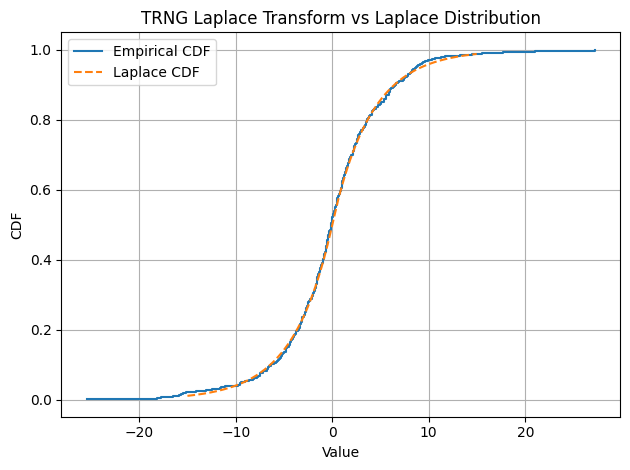

In [334]:
TRNG_df = pd.DataFrame(TRNG_laplace)
plot_cdf_vs_laplace(TRNG_df[0], "TRNG Laplace Transform vs Laplace Distribution")